[INIT] MMG: 138517 samples @ 1024.0 Hz


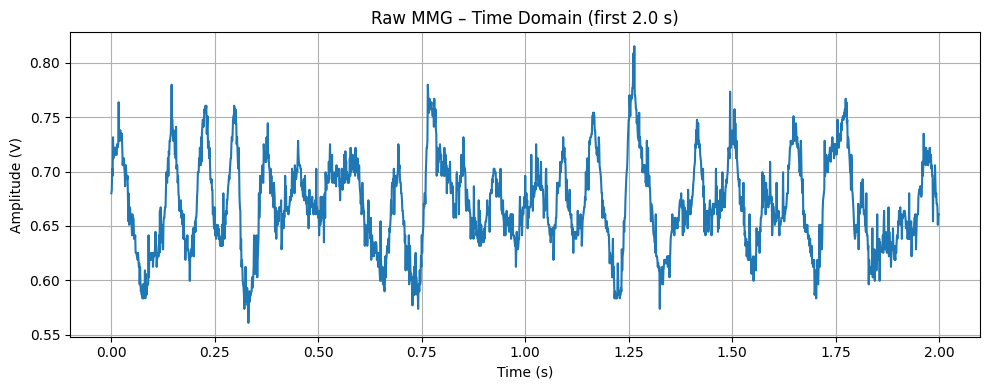

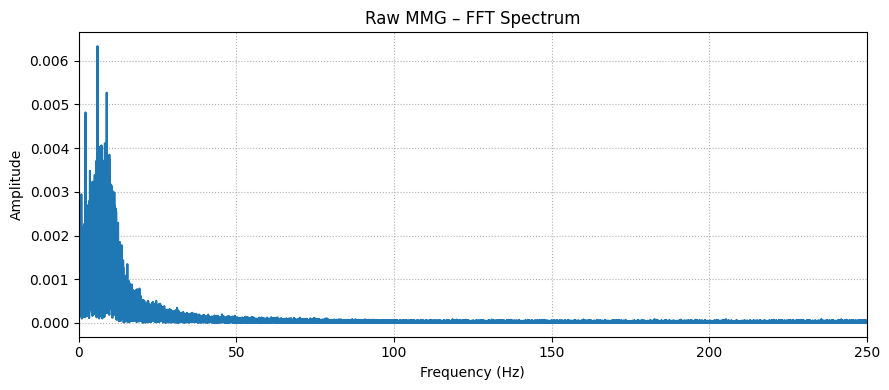

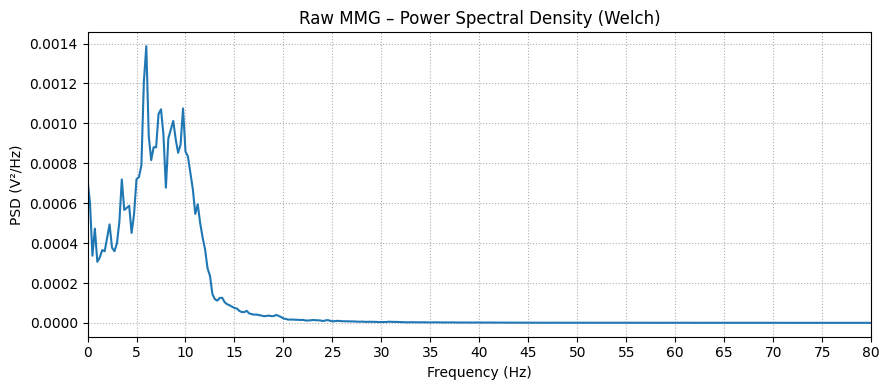

[FILTER] HP(3.0 Hz, ord 2) + LP(60.0 Hz, ord 4) (butter)


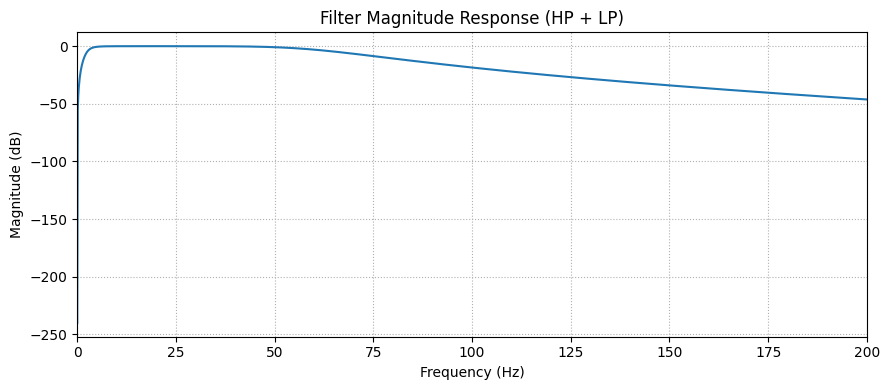

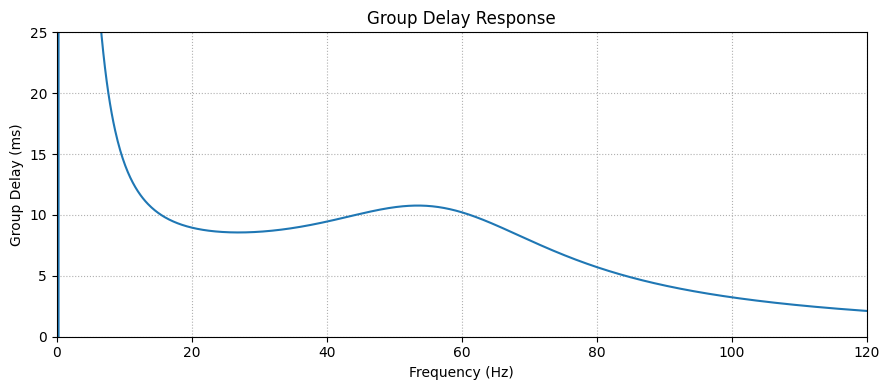

[FILTER] Applied HP+LP chain to 138517 samples.


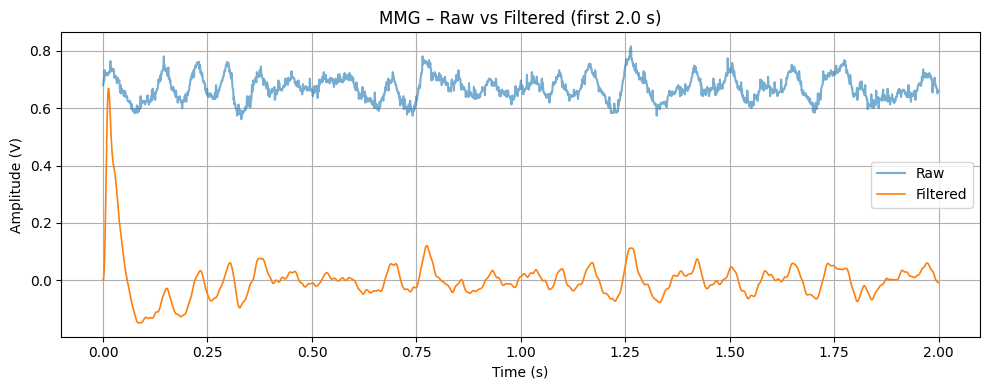

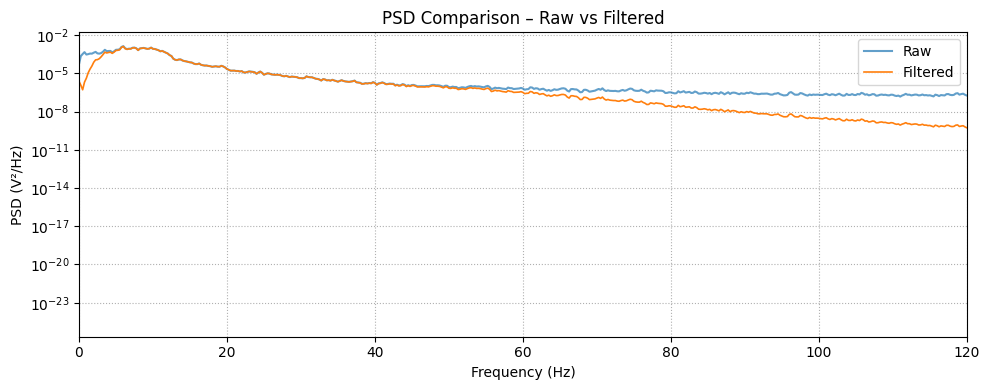

[RESULTS]
  Group delay (avg 5–60 Hz): 10.97 ms
  Empirical latency: 0.98 ms
  ΔSNR improvement: 3.49 dB


In [1]:
import numpy as np
from MMGFilterAnalyzer import MMGFilterAnalyzer

data = np.loadtxt("ADC_SUB1_STAGE2.csv", delimiter=",")
mmg = data[:, 1]   # column 2 is MMG
fs = 1024.0

analyzer = MMGFilterAnalyzer(mmg, fs)
analyzer.plot_raw_time_domain(duration=2)
analyzer.plot_raw_fft(max_hz=250)
analyzer.plot_raw_psd(max_hz=80)                # Welch PSD of raw
analyzer.design_filter(hp_cut=3, lp_cut=60)     # manual IIR design
analyzer.plot_filter_response()
analyzer.apply_filter()
analyzer.compare_filtered_vs_raw(duration=2, max_hz=120)
analyzer.compute_latency_and_snr(sig_band=(5,60))

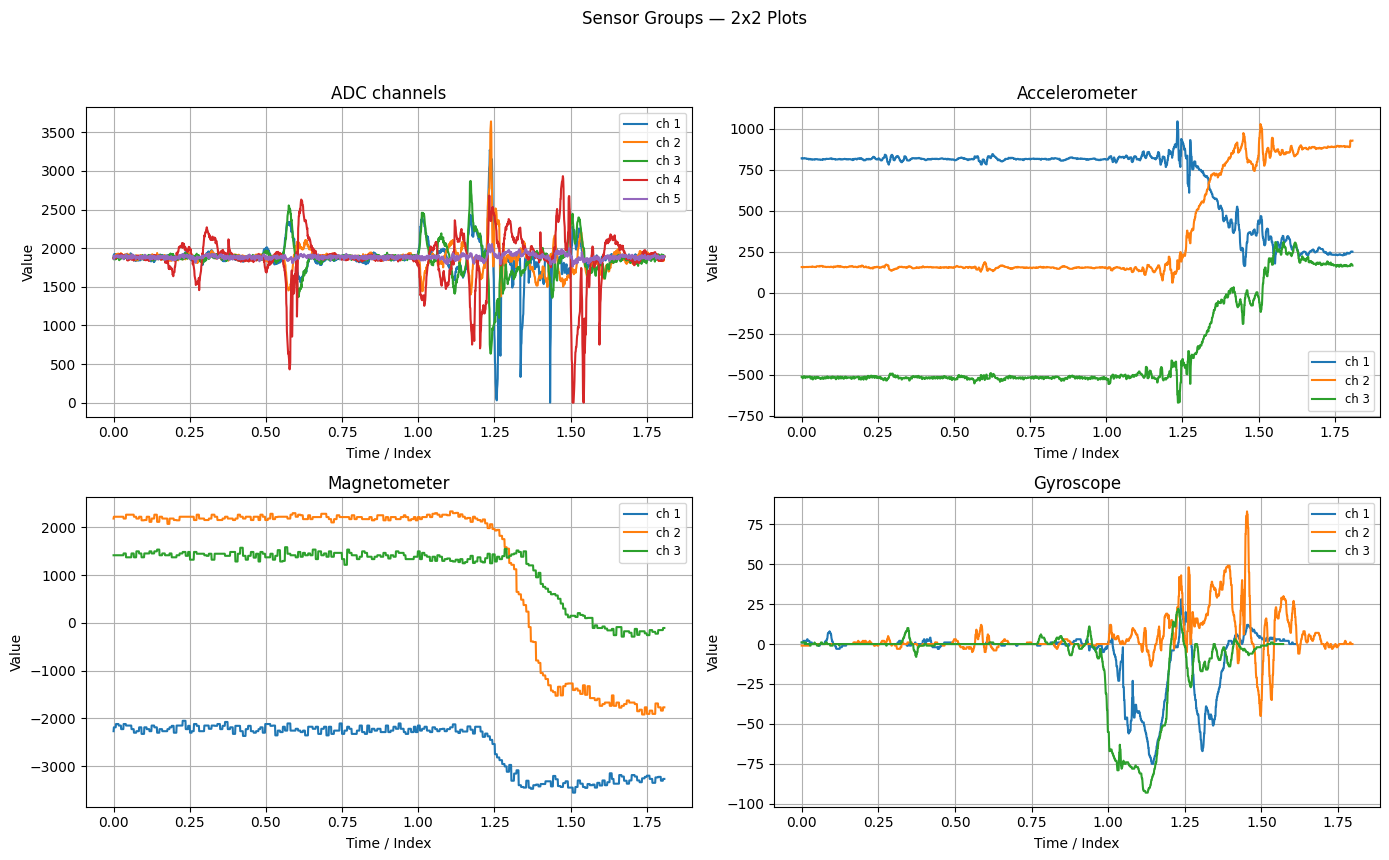

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

person = "zarif1"

# file lists (adjust as needed)
adc_files = [f"saved_data/{person}/test_2.csv",
             f"saved_data/{person}/test_3.csv",
             f"saved_data/{person}/test_4.csv",
             f"saved_data/{person}/test_5.csv",
             f"saved_data/{person}/test_6.csv"]

acc_files = [f"saved_data/{person}/test_9.csv",
             f"saved_data/{person}/test_10.csv",
             f"saved_data/{person}/test_11.csv"]

gyro_files = [f"saved_data/{person}/test_12.csv",
             f"saved_data/{person}/test_13.csv",
             f"saved_data/{person}/test_14.csv"]

mag_files = [f"saved_data/{person}/test_15.csv",
              f"saved_data/{person}/test_16.csv",
              f"saved_data/{person}/test_17.csv"]
# helper to safely load existing files
def load_dfs(file_list):
    dfs = []
    for f in file_list:
        if os.path.exists(f):
            try:
                dfs.append(pd.read_csv(f))
            except Exception:
                dfs.append(None)
        else:
            dfs.append(None)
    return dfs

adc_dfs = load_dfs(adc_files)
acc_dfs = load_dfs(acc_files)
mag_dfs = load_dfs(mag_files)
gyro_dfs = load_dfs(gyro_files)

fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.flatten()

groups = [
    (adc_dfs, "ADC channels"),
    (acc_dfs, "Accelerometer"),
    (mag_dfs, "Magnetometer"),
    (gyro_dfs, "Gyroscope"),
]

for ax, (dfs, title) in zip(axes, groups):
    ax.clear()
    plotted = False
    for i, df in enumerate(dfs):
        if df is None:
            continue
        numeric_cols = df.select_dtypes(include='number').columns
        if len(numeric_cols) >= 2:
            x = df[numeric_cols[0]]
            y = df[numeric_cols[1]]
            ax.plot(x, y, label=f"ch {i+1}")
            plotted = True
        elif len(numeric_cols) == 1:
            y = df[numeric_cols[0]]
            ax.plot(y, label=f"ch {i+1}")
            plotted = True
    ax.set_title(title)
    ax.grid(True)
    if plotted:
        ax.legend(fontsize="small", loc="best")
    ax.set_xlabel("Time / Index")
    ax.set_ylabel("Value")

plt.suptitle("Sensor Groups — 2x2 Plots")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

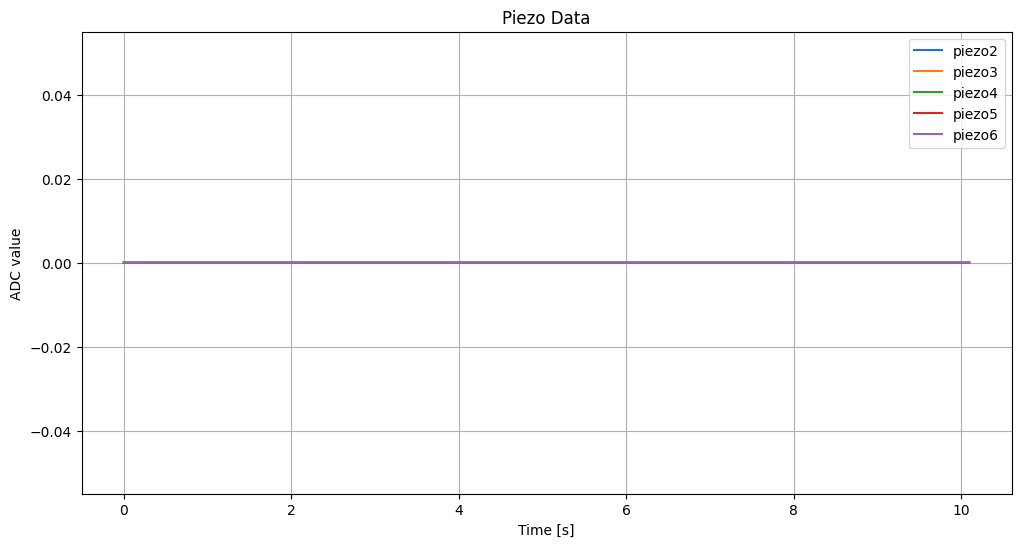

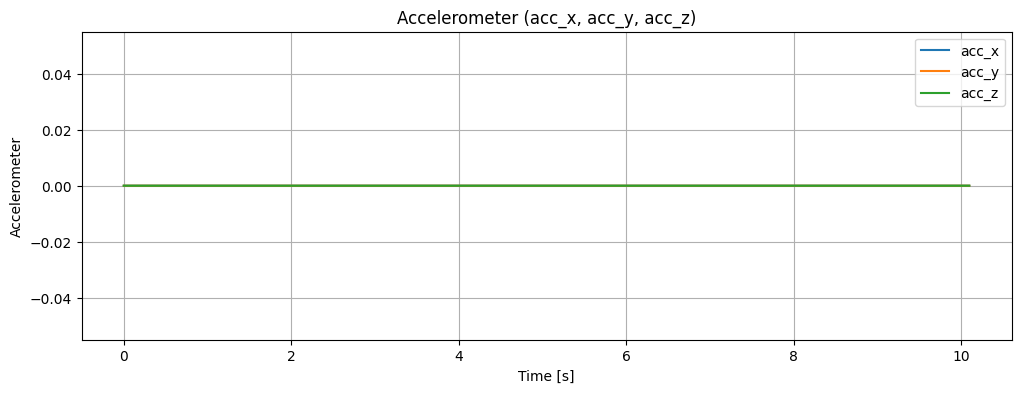

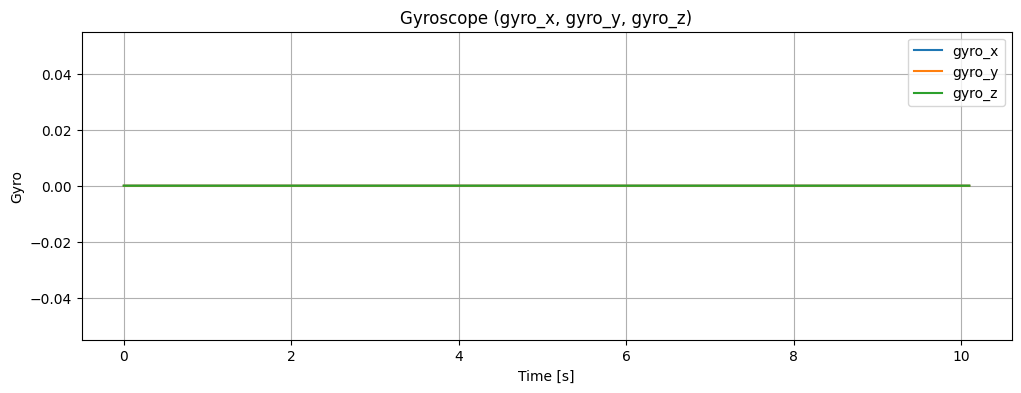

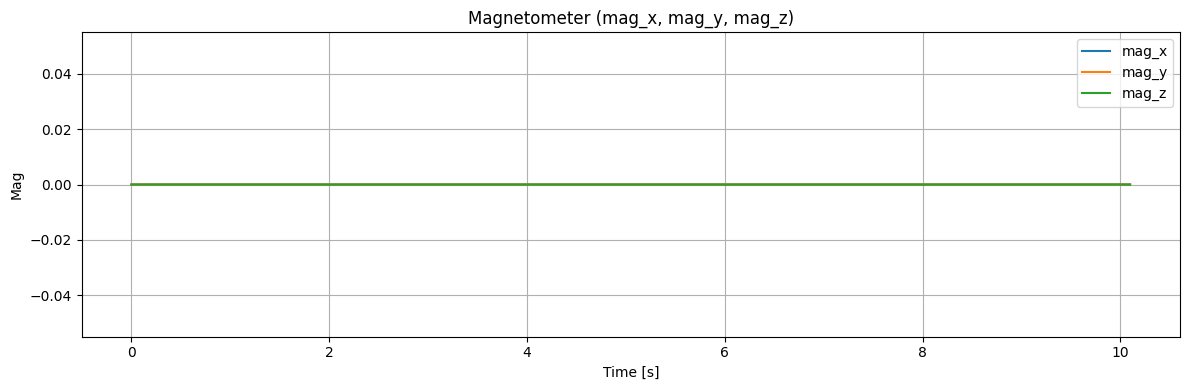

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- CONFIG ----
CSV_FILE = "saved_data/demo/test_all.csv"   # change this if your filename/path is different

def main():
    # Load data
    df = pd.read_csv(CSV_FILE)

    # Expecting these columns:
    # timestamp, piezo1..piezo6, fsr1, fsr2,
    # acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, mag_x, mag_y, mag_z

    t = df["timestamp"]

    # ---------- FIGURE 1: Piezo + FSR ----------
    plt.figure(figsize=(12, 6))
    piezo_cols = [f"piezo{i}" for i in range(2, 7)]
    # fsr_cols = ["fsr1", "fsr2"]
    fsr_cols = []

    for col in piezo_cols:
        if col in df.columns:
            plt.plot(t, df[col], label=col)

    for col in fsr_cols:
        if col in df.columns:
            plt.plot(t, df[col], label=col)

    plt.title("Piezo Data")
    plt.xlabel("Time [s]")
    plt.ylabel("ADC value")
    plt.legend(loc="best")
    plt.grid(True)

    # ---------- FIGURE 2: Accelerometer ----------
    plt.figure(figsize=(12, 4))
    for col in ["acc_x", "acc_y", "acc_z"]:
        if col in df.columns:
            plt.plot(t, df[col], label=col)

    plt.title("Accelerometer (acc_x, acc_y, acc_z)")
    plt.xlabel("Time [s]")
    plt.ylabel("Accelerometer")
    plt.legend(loc="best")
    plt.grid(True)

    # ---------- FIGURE 3: Gyroscope ----------
    plt.figure(figsize=(12, 4))
    for col in ["gyro_x", "gyro_y", "gyro_z"]:
        if col in df.columns:
            plt.plot(t, df[col], label=col)

    plt.title("Gyroscope (gyro_x, gyro_y, gyro_z)")
    plt.xlabel("Time [s]")
    plt.ylabel("Gyro")
    plt.legend(loc="best")
    plt.grid(True)

    # ---------- FIGURE 4: Magnetometer ----------
    plt.figure(figsize=(12, 4))
    for col in ["mag_x", "mag_y", "mag_z"]:
        if col in df.columns:
            plt.plot(t, df[col], label=col)

    plt.title("Magnetometer (mag_x, mag_y, mag_z)")
    plt.xlabel("Time [s]")
    plt.ylabel("Mag")
    plt.legend(loc="best")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


Task 1: estimated fs ≈ 1000.00 Hz


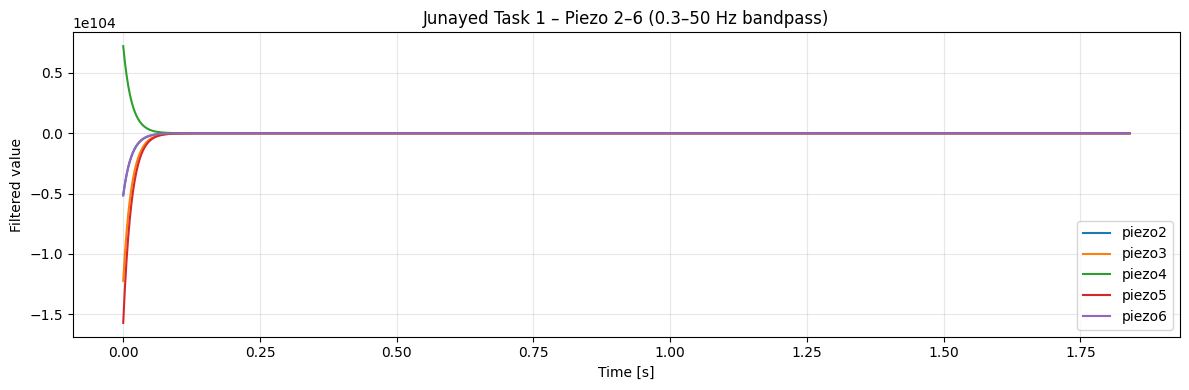

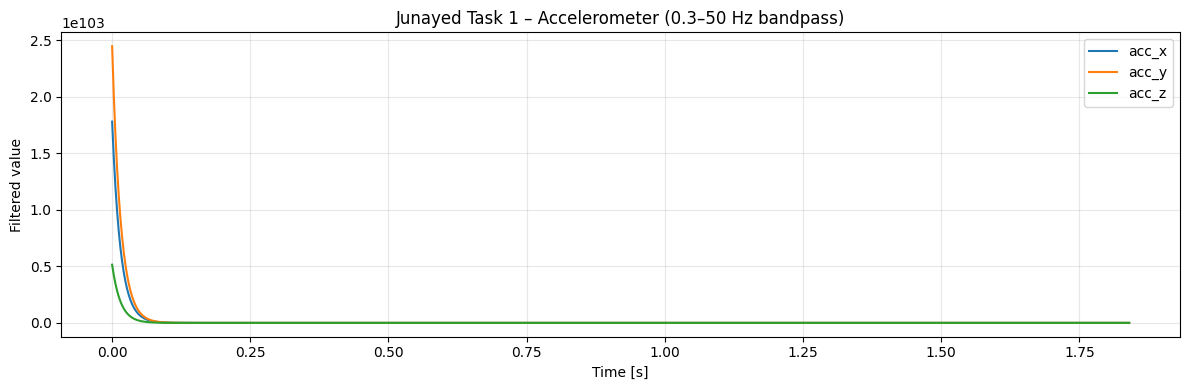

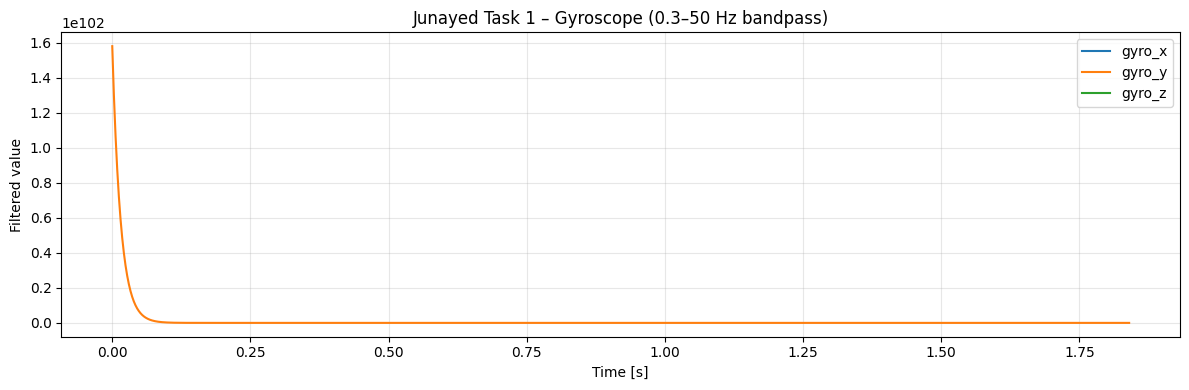

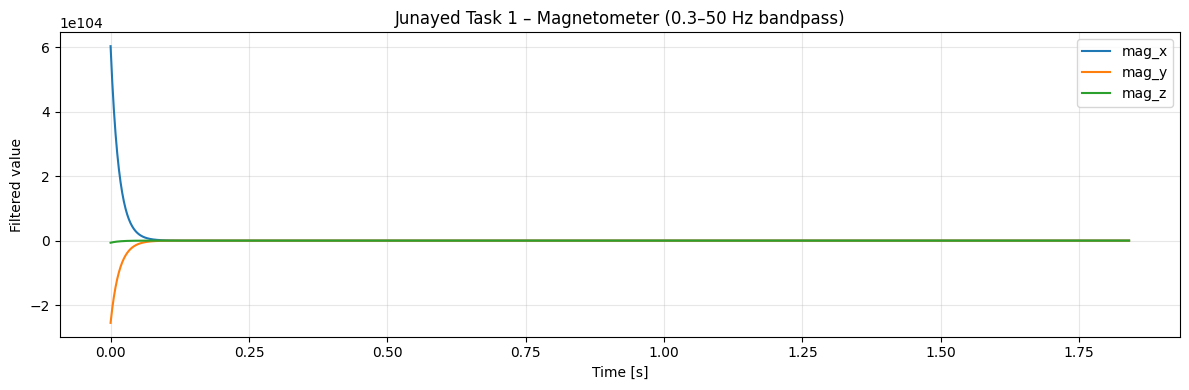

Task 2: estimated fs ≈ 1000.00 Hz


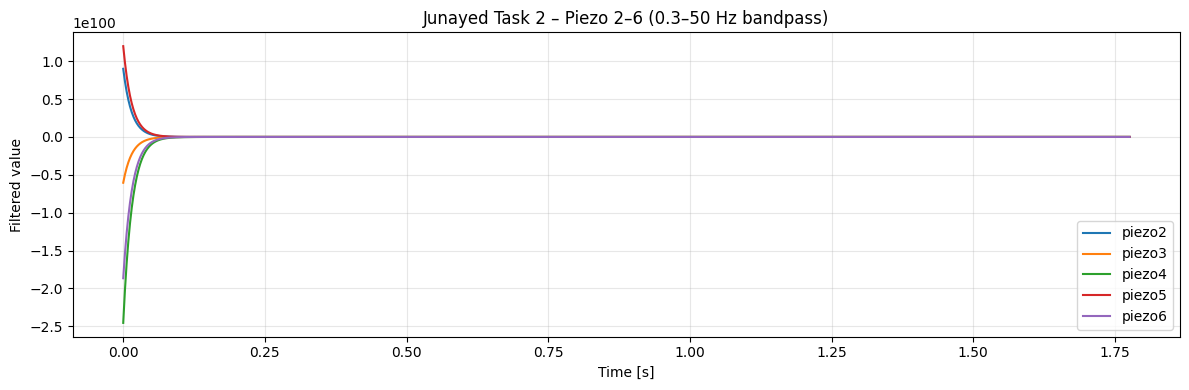

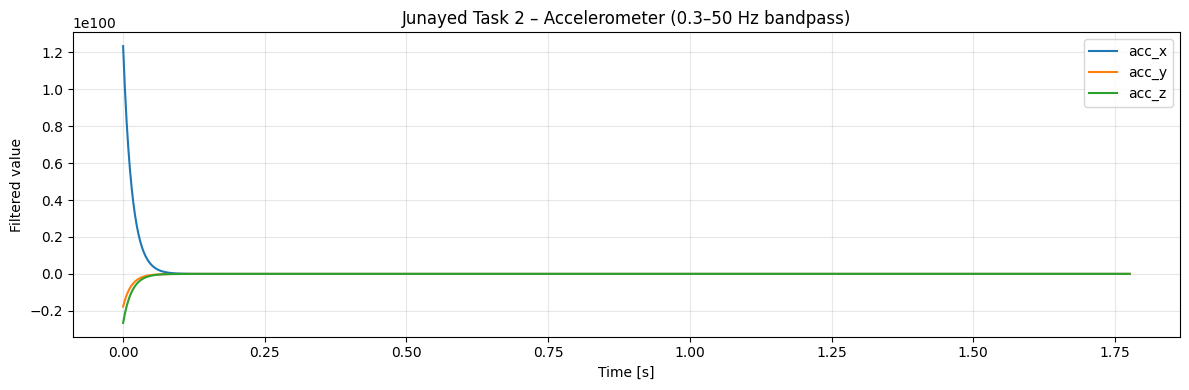

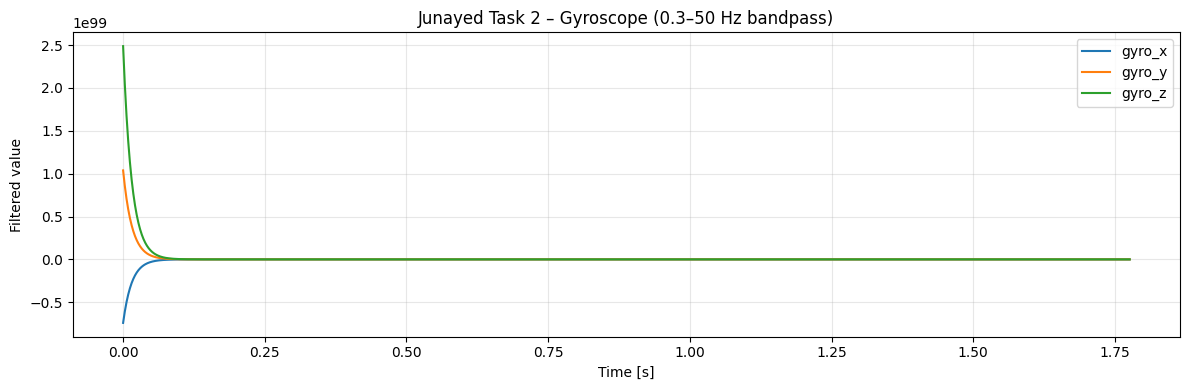

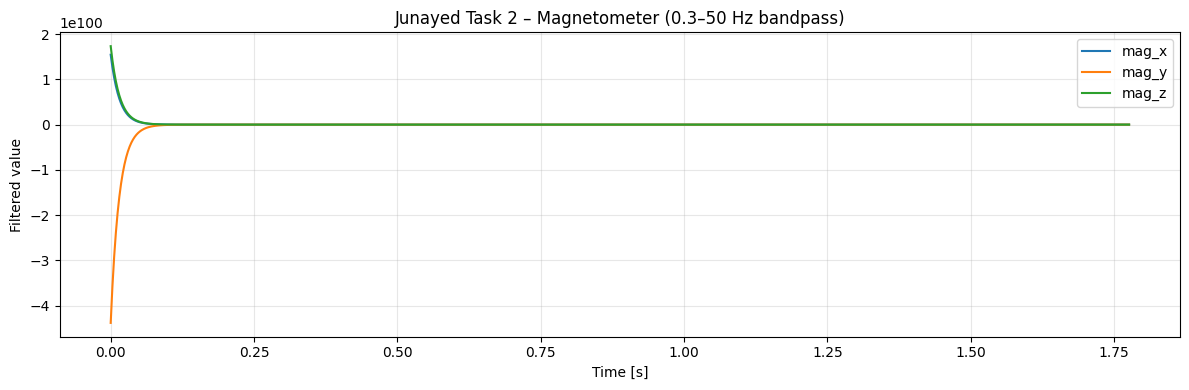

Task 3: estimated fs ≈ 1000.00 Hz


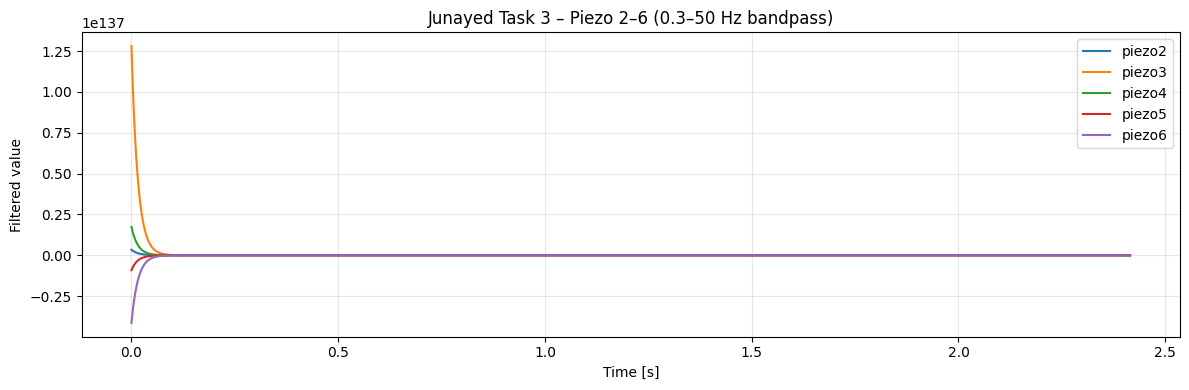

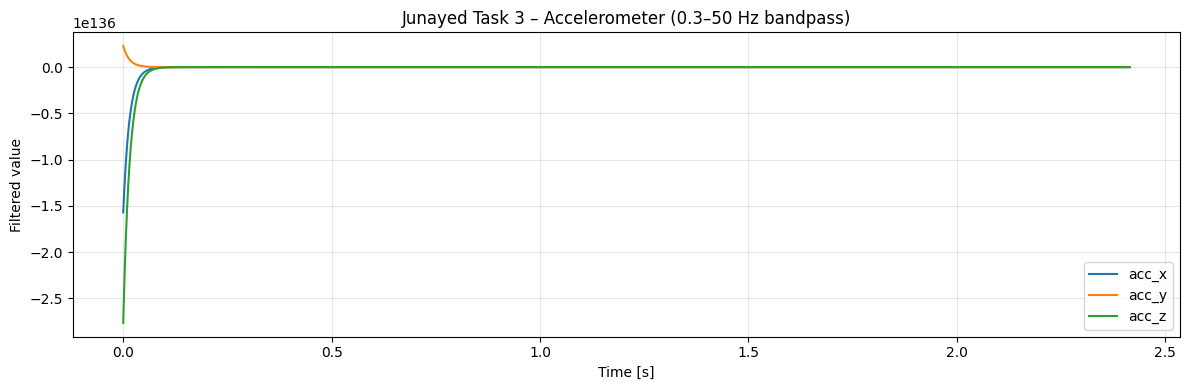

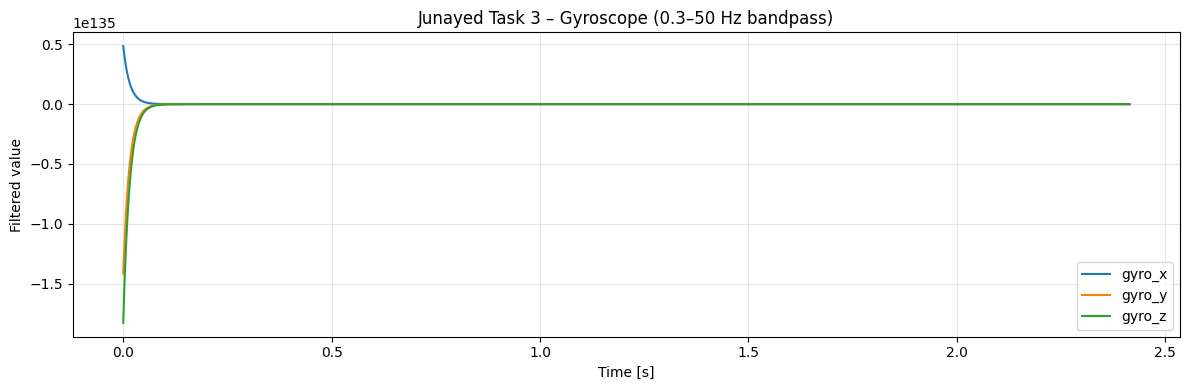

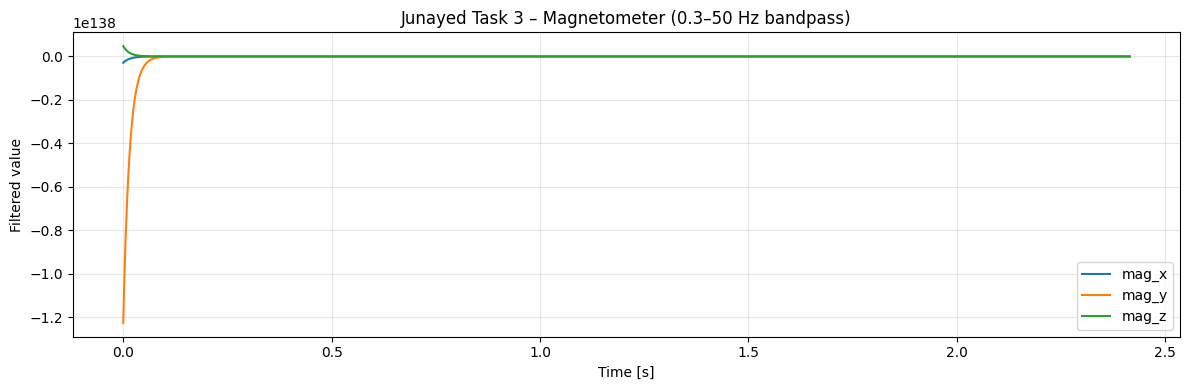

Task 4: estimated fs ≈ 1000.00 Hz


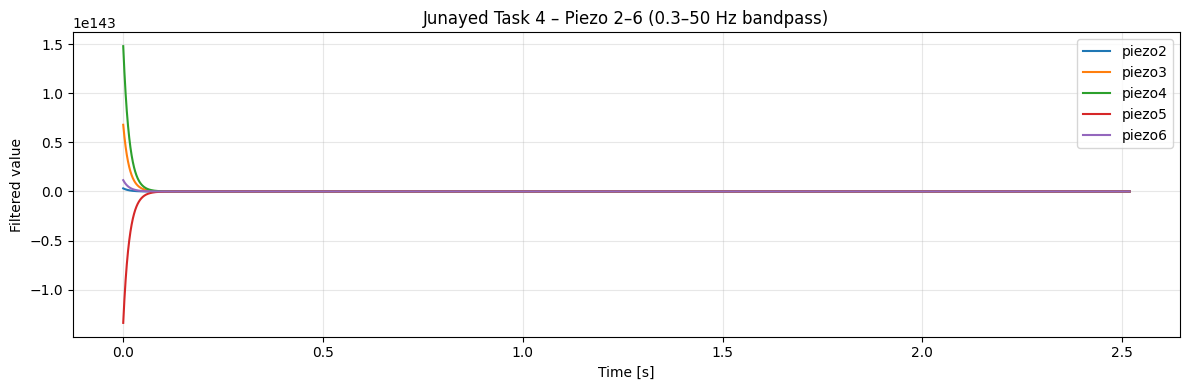

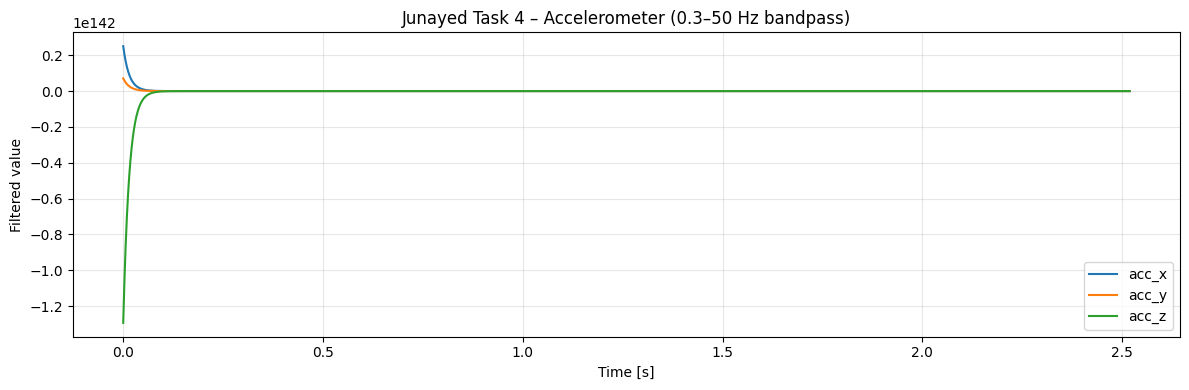

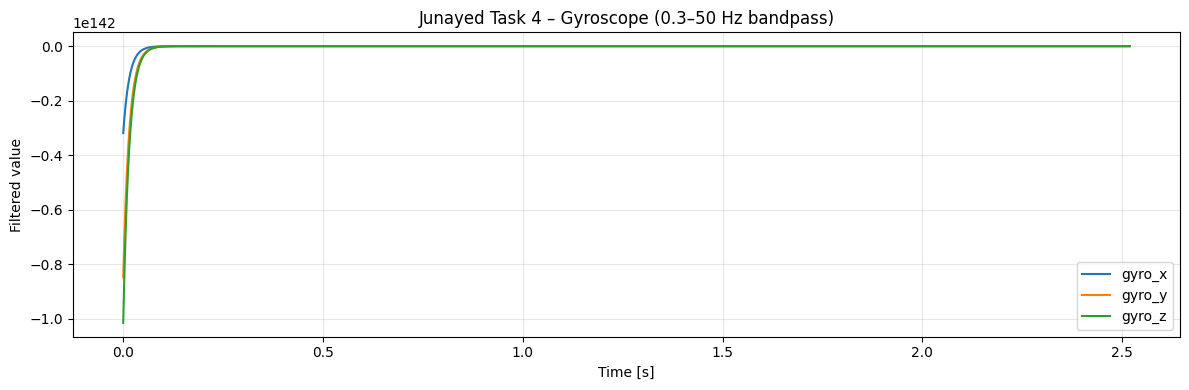

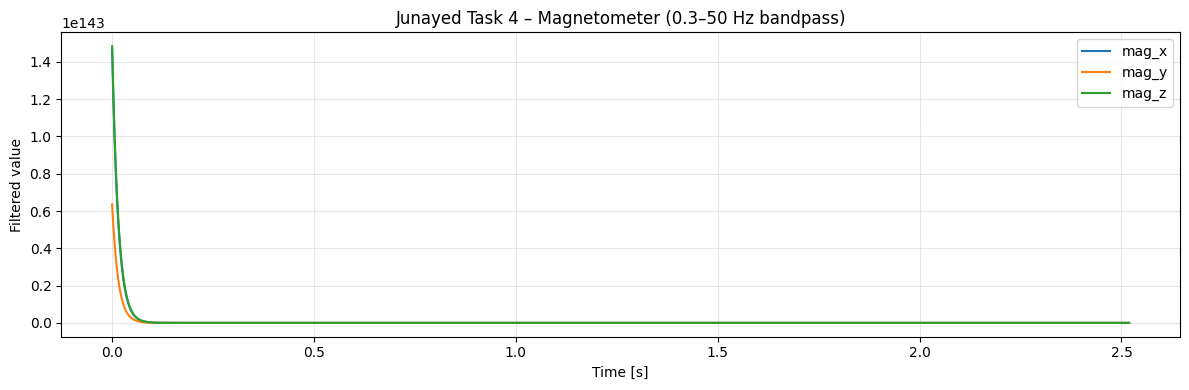

Task 5: estimated fs ≈ 1000.00 Hz


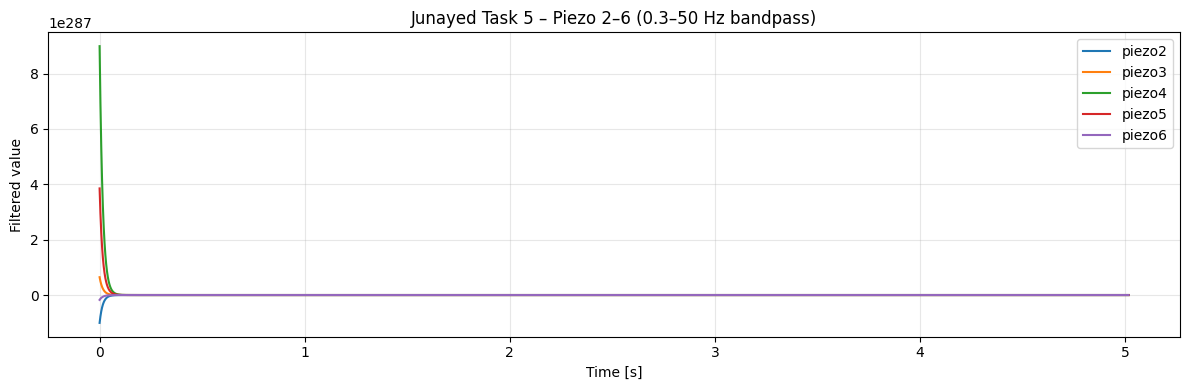

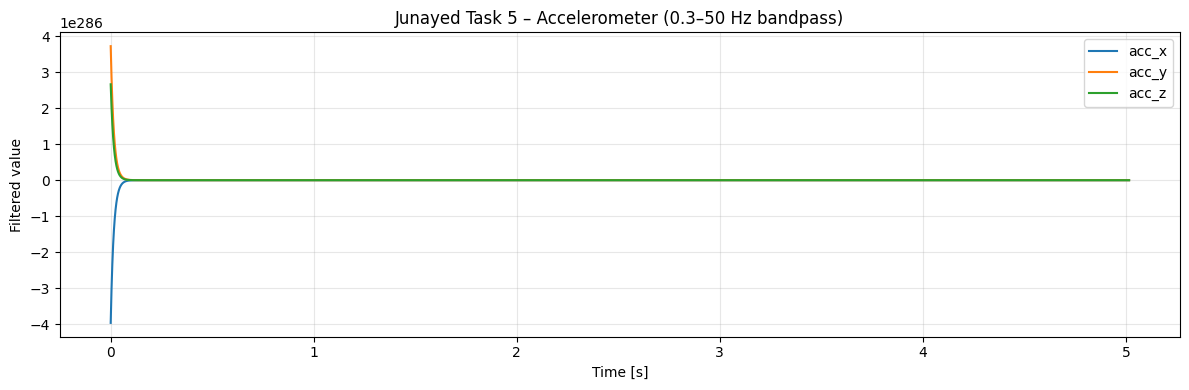

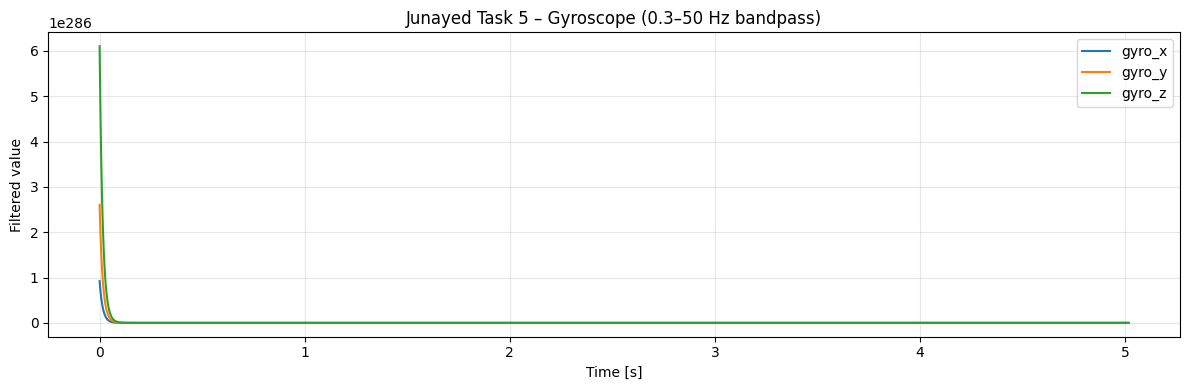

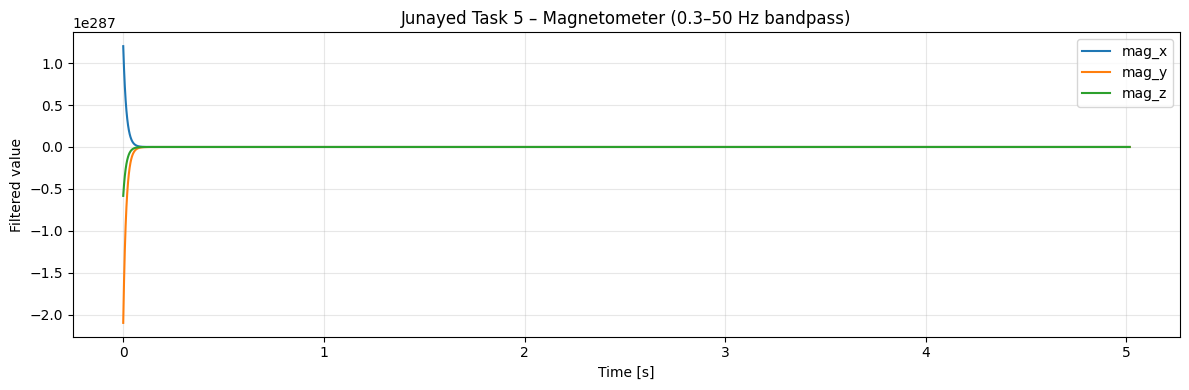

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# ----------------- CONFIG -----------------
data_root = "saved_data/junayed"
task_ids = [1, 2, 3, 4, 5]     # change if needed

lowcut = 0.045    # Hz
highcut = 7.5  # Hz
filter_order = 6
# ------------------------------------------


def estimate_fs(t):
    """Estimate sampling frequency from timestamp array."""
    dt = np.median(np.diff(t))
    return 1.0 / dt


def design_bandpass(lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a


def bandpass_series(x, b, a):
    """Remove DC, then apply zero-phase bandpass."""
    x = np.asarray(x, dtype=float)
    x = x - np.mean(x)          # DC removal
    return filtfilt(b, a, x)


def plot_group(t, df, cols, title):
    plt.figure(figsize=(12, 4))
    for c in cols:
        if c in df.columns:
            y = bandpass_series(df[c].values, b, a)
            plt.plot(t, y, label=c)
    plt.title(title)
    plt.xlabel("Time [s]")
    plt.ylabel("Filtered value")
    plt.grid(True, alpha=0.3)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


for task_id in task_ids:
    path = f"{data_root}/junayed_task_{task_id}.csv"
    df = pd.read_csv(path)

    t = df["timestamp"].values
    # fs = estimate_fs(t)
    fs = 1000

    b, a = design_bandpass(lowcut, highcut, fs, order=filter_order)

    print(f"Task {task_id}: estimated fs ≈ {fs:.2f} Hz")

    # Columns
    piezo_cols = [f"piezo{i}" for i in range(2, 7)]
    acc_cols   = ["acc_x", "acc_y", "acc_z"]
    gyro_cols  = ["gyro_x", "gyro_y", "gyro_z"]
    mag_cols   = ["mag_x", "mag_y", "mag_z"]

    # 1) Piezo 2–6
    plot_group(
        t, df, piezo_cols,
        f"Junayed Task {task_id} – Piezo 2–6 (0.3–50 Hz bandpass)"
    )

    # 2) Accelerometer
    plot_group(
        t, df, acc_cols,
        f"Junayed Task {task_id} – Accelerometer (0.3–50 Hz bandpass)"
    )

    # 3) Gyroscope
    plot_group(
        t, df, gyro_cols,
        f"Junayed Task {task_id} – Gyroscope (0.3–50 Hz bandpass)"
    )

    # 4) Magnetometer
    plot_group(
        t, df, mag_cols,
        f"Junayed Task {task_id} – Magnetometer (0.3–50 Hz bandpass)"
    )
